# Example 1: Simulating a Traffic Network

In this example, we will use the TRACKSIM to simulate vehicle traffic in a SUMO network. For the purposes of this example, we will simulate the charming city of Geldrop, Netherlands which has a population of around 29 thousand people (2023). The corresponding SUMO scenario was created using the osmWebWizard tool from SUMO which is fast way to generate working SUMO scenarios. For more information about osmWebWizard, please refer to the documentation at https://sumo.dlr.de/docs/Tools/Import/OSM.html .

The traffic simulator is handled by the Traffic class in TRACKSIM.

In [7]:
from tracksim.tracksim import Traffic

help(Traffic)

Help on class Traffic in module tracksim.tracksim:

class Traffic(builtins.object)
 |  Traffic(config_path, output_dir='simulated_trip_files', duration=24, time_step=1, record_position=False, record_lane=False, pbar=True, lite_mode_ratio=None, lite_mode_seed=None, remove_split_trip_files=True)
 |
 |  Class used to define and run the traffic simulation. The main method of
 |  this class is 'simulate_traffic'.
 |
 |  Methods defined here:
 |
 |  __init__(self, config_path, output_dir='simulated_trip_files', duration=24, time_step=1, record_position=False, record_lane=False, pbar=True, lite_mode_ratio=None, lite_mode_seed=None, remove_split_trip_files=True)
 |      Initializes the Traffic class used for simulating the vehicle traffic.
 |
 |      Parameters
 |      ----------
 |      config_path : str
 |          The path to the SUMO configuration file for the scenario to be
 |          simulated.
 |      output_dir : str, optional
 |          directory to store the final simulated trip fi

The traffic class has multiple optional settings which can be configured (please refer to the docstring). However, it is required to give the path to the SUMO configuration file as input. In this example, we will only simulate 1 hour of traffic with a sample interval of 1 second. Additionally, we will enable tracking of the position of each vehicle.

In [8]:
config_path = 'example_SUMO_scenarios/Geldrop/osm.sumocfg'

traffic = Traffic(config_path, duration=1, time_step=1, record_position=True)

In [9]:
traffic.simulate_traffic()


Making 'simulated_trips_split'

Starting simulation

Started simulation with timedelta: 1.0s


100%|███████████████████████████████████████████████████████████████████████████| 3600/3600.0 [00:23<00:00, 151.12it/s]



 Finished simulation in 25.89 seconds!

Purging 'simulated_trip_files'


 94%|███████████████████████████████████████████████████████████████████████▌    | 2285/2426 [00:00<00:00, 2616.50it/s]


Processing simulation data


100%|█████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:15<00:00, 156.01it/s]



Removing 'simulated_trips_split'


100%|████████████████████████████████████████████████████████████████████████████| 2426/2426 [00:00<00:00, 3196.99it/s]


Once the simulation has finished, all trip files are found in a directory named 'simulated_trip_files'. The data from each trip is stored in a CSV file. The name of each trip file corresponds to the ID of the vehicle. Let's look at the data for one trip.

In [46]:
import pandas as pd

trip_file = 'simulated_trip_files/veh0.csv'
trip_data = pd.read_csv(trip_file)

trip_data.info()
trip_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time [s]     1318 non-null   int64  
 1   Speed [m/s]  1318 non-null   float64
 2   x [m]        1318 non-null   float64
 3   y [m]        1318 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 41.3 KB


,Time [s],Speed [m/s],x [m],y [m]
0,0,0.000000,3314.390000,1774.830000
1,1,2.340035,3314.362245,1772.499260
2,2,4.327291,3314.318089,1768.167955
3,3,5.820755,3314.258553,1762.341919
4,4,8.417111,3314.163444,1753.924808


The trip data contains the time of the simulation, the speed of the vehicle in meters per second and the x and y position of the vehicle in meters.

The path of the vehicle can be plotted.

Text(0, 0.5, 'y [m]')

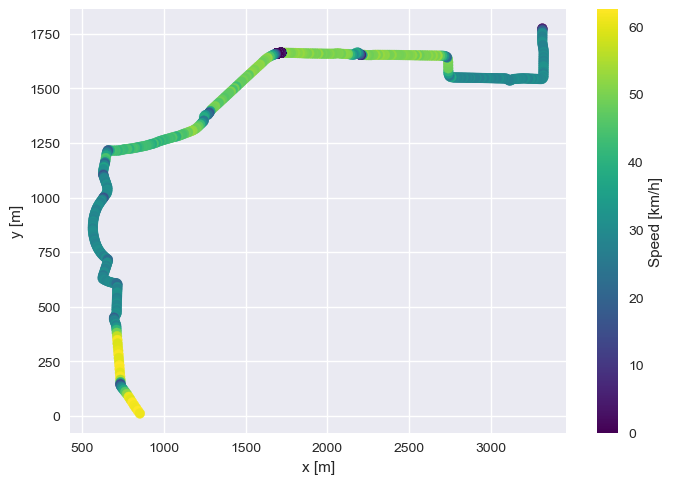

In [52]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-notebook')

plt.figure()
plt.scatter(trip_data['x [m]'], trip_data['y [m]'], c=trip_data['Speed [m/s]']*3.6, cmap='viridis')
plt.colorbar(label='Speed [km/h]')
plt.xlabel('x [m]')
plt.ylabel('y [m]')

Likewise, we can plot the speed of the vehicle over time.

Text(0, 0.5, 'Speed [km/h]')

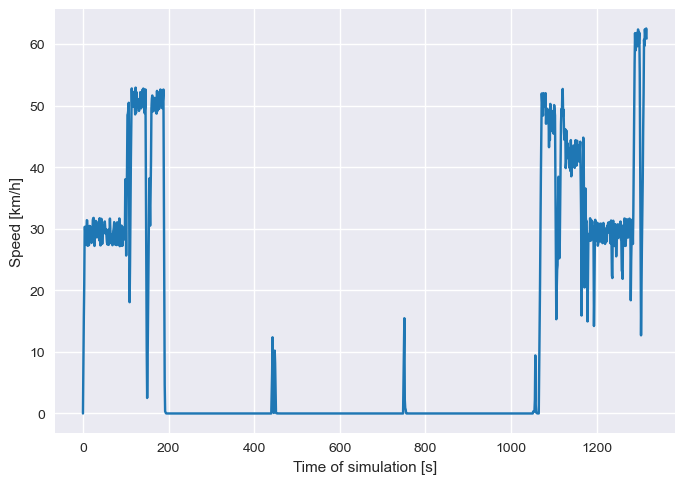

In [53]:
plt.figure()

plt.plot(trip_data['Time [s]'], trip_data['Speed [m/s]']*3.6) # Convert to km/h
plt.xlabel('Time of simulation [s]')
plt.ylabel('Speed [km/h]')

SUMO has a tendency to give speeds which can vary a lot over a short time. This can lead to high acceleration/deacceleration peaks and potentially unrealistic battery measurements. One way to mitigate this is to low-pass filter the speed profile. This can be done using an exponential moving average.

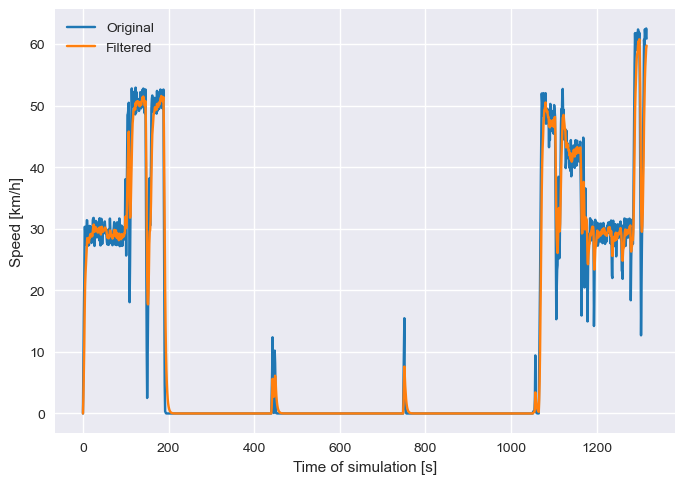

In [54]:
from tracksim.tracksim import exp_average

speed_filtered = exp_average(trip_data['Speed [m/s]'], 0.3)

plt.figure()

plt.plot(trip_data['Time [s]'], trip_data['Speed [m/s]']*3.6, label='Original')
plt.plot(trip_data['Time [s]'], speed_filtered*3.6, label='Filtered')
plt.xlabel('Time of simulation [s]')
plt.ylabel('Speed [km/h]')
plt.legend()